In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.options.mode.chained_assignment = None

In [2]:
ibm_df = pd.read_csv("data/3Stocks/IBM_1min.csv")
jnj_df = pd.read_csv("data/3Stocks/JNJ_1min.csv")
wmt_df = pd.read_csv("data/3Stocks/WMT_1min.csv")

In [3]:
print(ibm_df.shape, jnj_df.shape, wmt_df.shape)

(958596, 8) (958596, 8) (958596, 8)


In [25]:
ibm_small_df = ibm_df.iloc[:50000]

In [10]:
5*60+25+56

381

In [11]:
380+381+381+381

1523

2010-01-04: 9:36:00 - 15:55:00
2010-01-05: 9:35:00 - 15:55:00
2010-01-06: 9:35:00 - 15:55:00

In [12]:
ibm_small_df.iloc[1523]

Date Time    2010-01-07 15:55:00
Open                     83.8285
High                     83.8673
Low                      83.8272
Close                    83.8414
Volume                   43250.0
Date                  2010-01-07
Time                    15:55:00
Name: 1523, dtype: object

In [26]:
ibm_small_df['Date Time'] = pd.to_datetime(ibm_small_df['Date Time'])

In [148]:
ibm_df['Date Time'] = pd.to_datetime(ibm_df['Date Time'])

In [27]:
ibm_small_df['Log_Returns'] = np.log(ibm_small_df['Close'] / ibm_small_df['Close'].shift(1))

In [149]:
ibm_df['Log_Returns'] = np.log(ibm_df['Close'] / ibm_df['Close'].shift(1))

In [152]:
ibm_small_df.dropna(inplace=True)

In [154]:
daily_log_returns_large = ibm_df.resample('D', on='Date Time').sum()["Log_Returns"]

In [158]:
daily_log_returns_large.shape

(3649,)

In [85]:
mm_scaler_x = MinMaxScaler(feature_range=(-255,255))

In [159]:
pre_scale = np.reshape(daily_log_returns_large, (-1,1))

In [160]:
pre_scale.shape

(3649, 1)

In [79]:
np.reshape(np.array([-2,0,1,2]), (-1,1)).shape

(4, 1)

In [161]:
pre_scale

array([[ 0.00704151],
       [-0.01290938],
       [-0.00613406],
       ...,
       [ 0.        ],
       [-0.02001493],
       [ 0.01065451]])

In [162]:
scaled_vol = mm_scaler_x.fit_transform(pre_scale)

In [105]:
vol_chart = np.empty([1,1,3])

In [120]:
test = np.array([[255,255,0], [255,0,0],[255,0,0], [255,0,0]])

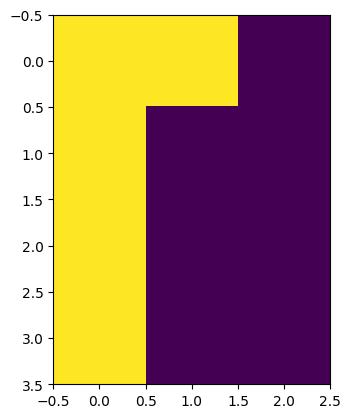

In [121]:
plt.imshow(test)

In [163]:
scaled_vol.shape

(3649, 1)

In [164]:
I = np.arange(n)
matrix = np.column_stack((3*I, I**2))

In [202]:
red = np.zeros(3694)
green = np.zeros(3694)
blue = np.zeros(3694)

In [203]:
for i in range(len(scaled_vol)):
    if scaled_vol[i] < 0:
        red[i] = np.abs(scaled_vol[i])
    elif scaled_vol[i] > 0:
        green[i] = scaled_vol[i]
    elif scaled_vol[i] == 0:
        continue
    else:
        print(error)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_41135/3294725370.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_vol[i]
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_41135/3294725370.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_vol[i])


In [204]:
testing = np.column_stack((red, green, blue))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


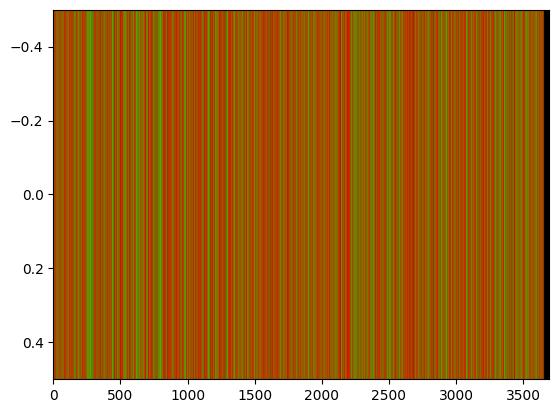

In [205]:
plt.imshow(np.array([testing]), aspect = "auto")

In [199]:
testing[1]

array([-38.07914813,   0.        ,   0.        ])

In [178]:
np.array([[[255,0,0], [0,255,0], [0,0,255]]]).shape

(1, 3, 3)

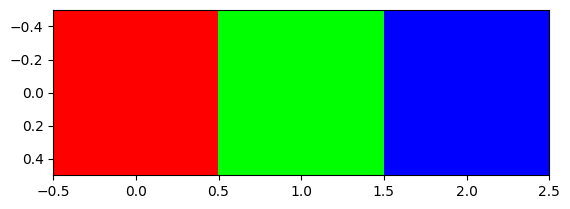

In [167]:
plt.imshow(np.array([[[255,0,0], [0,255,0], [0,0,255]]]))

In [ ]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])

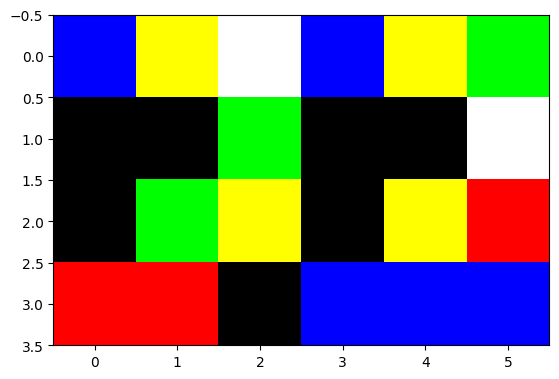

In [136]:
palette = np.array([[255,   0,   0], # index 0: red
                   [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0], # index 5: yellow
                     ], dtype=np.uint8)
     

m, n = 4, 6

indices = np.random.randint(0, len(palette), size=(4, 6))
indices
np.array([[2, 4, 0, 1, 4, 2],
       [1, 1, 5, 5, 2, 0],
       [4, 4, 3, 3, 0, 4],
       [2, 5, 0, 5, 2, 3]])

In [21]: plt.imshow(palette[indices])

In [138]:
palette[indices]

array([[[  0,   0, 255],
        [255, 255,   0],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [  0,   0,   0],
        [255, 255,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)

In [98]:
for n in scaled_vol:
    if n == 0:

array([[ 3.27110592e+01],
       [-9.30913652e+01],
       [-5.03688796e+01],
       [-3.89017893e+01],
       [ 4.98603612e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-7.12925728e+01],
       [ 3.34250181e+01],
       [-1.94283411e+01],
       [ 9.00888991e+01],
       [-4.12873539e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 9.59968775e+01],
       [-1.79230351e+02],
       [-7.99169179e+01],
       [-1.86958066e+02],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 2.13605241e+01],
       [-3.06994237e+01],
       [ 6.81826328e+00],
       [-1.38820618e+02],
       [-5.92643377e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 8.36026242e+01],
       [ 3.46773850e+01],
       [-4.66886173e+00],
       [-1.45503745e+02],
       [ 8.69345780e-02],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-5.10901626e+01],
       [ 4.79640077e+01],
       [-3.52767930e+01],
       [ 4.5

In [92]:
plt.imshow(img, extent=[0, 16000, 0, 1], aspect='auto')

NameError: name 'img' is not defined

In [95]:
ibm_small_df["Realized_Volatility"] = ibm_small_df["Log_Returns"].rolling(window=252).std()

In [96]:
realized_volatility = np.sqrt(sum_squared_log_returns)

NameError: name 'sum_squared_log_returns' is not defined

In [93]:
realized_volatility

NameError: name 'realized_volatility' is not defined